<a href="https://colab.research.google.com/github/TranThaiAn19146304/BT_CNN2/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BƯỚC 1: THÊM THƯ VIỆN**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Optimizer
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

**BƯỚC 2: LẤY DỮ LIỆU**

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

**BƯỚC 3: TẠO MODEL** 

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

**BƯỚC 4: TRAINING**

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128, epochs = 10,verbose = 1, validation_data =(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 1.0823 - accuracy: 0.5985 - val_loss: 0.1515 - val_accuracy: 0.9675
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.5045 - accuracy: 0.8214 - val_loss: 0.0681 - val_accuracy: 0.9803
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3594 - accuracy: 0.8713 - val_loss: 0.0520 - val_accuracy: 0.9843
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3164 - accuracy: 0.8833 - val_loss: 0.0438 - val_accuracy: 0.9870
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2871 - accuracy: 0.8910 - val_loss: 0.0388 - val_accuracy: 0.9873
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2599 - accuracy: 0.9043 - val_loss: 0.0393 - val_accuracy: 0.9868
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2317 - accuracy: 0.9171 - val_loss: 0.0304 - val_accuracy: 0.9901
Epoch 

**BƯỚC 5: VẼ ĐỒ THỊ CHẤT LƯỢNG**

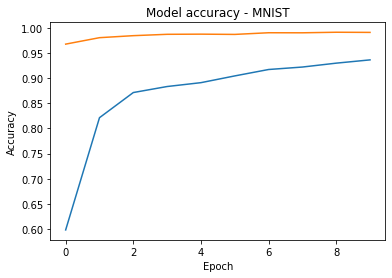

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy - MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

**BƯỚC 6: NHẬN DẠNG**

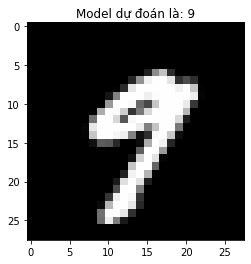

In [ ]:
(x_train,y_train),(x_test,y_test) =datasets.mnist.load_data()

x_pre = x_test[20]
plt.title("Model dự đoán là: " + str(np.argmax(model.predict(x_pre.reshape((1,28,28,1))))))
plt.imshow(x_pre, cmap=plt.get_cmap('gray'))


**BƯỚC 7: LƯU MODEL**

In [ ]:
model.save('mnist.h5')